In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
#load data
data_df = pd.read_csv("../db/stock_data_with_forward_perf.csv")
data_df.columns



Index(['name', 'ticker', 'Quarter end', 'Shares', 'Shares split adjusted',
       'Split factor', 'Assets', 'Current Assets', 'Liabilities',
       'Current Liabilities', 'Shareholders equity',
       'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio', 'mktcap_revenue_value', '

In [3]:
features_columns = ['P/E ratio']

#features_data_df=data_df.loc[data_df['EPS basic'] > 0.0, 'EPS basic']
features_data_df=data_df['P/E ratio']
X = features_data_df.values
X
#target_data_df = data_df.loc[data_df['three_year_return'] > 0.0, 'three_year_return']
target_data_df = data_df['three_year_return']
y = target_data_df.values
print(y.size, X.size)

58618 58618


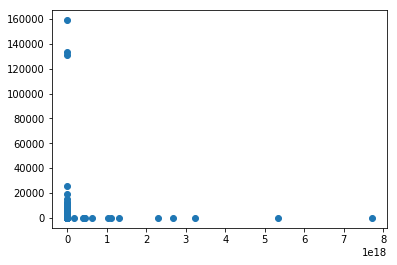

In [5]:
plt.scatter(X, y)
plt.savefig("univ_linear_regression.png")

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X=X.reshape(-1, 1)
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [10]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [-1.44657379e-17]
y-axis intercept:  63.033289871290634


Our linear model now looks like this: 

$y = 101.896225057 + 12.44002424 x$


In [11]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0.0
Predicted output: 63.033289871290634
Prediction Error: 63.033289871290634


In [12]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,63.03329,0.000000,63.033290
1,63.03329,0.000000,63.033290
2,63.03329,0.000000,63.033290
3,63.03329,0.000000,63.033290
4,63.03329,0.000000,63.033290
5,63.03329,0.000000,63.033290
6,63.03329,0.000000,63.033290
7,63.03329,0.000000,63.033290
8,63.03329,0.000000,63.033290
9,63.03329,0.000000,63.033290


In [13]:
x_min = X.min()
x_max = X.max()

In [14]:
y_min_actual = y.min()
y_max_actual = y.max()

In [15]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: -99.99580704521978
Calculated Min Value: 101.896225057
Actual Max Value: 158947.24919093854
Calculated Max Value: 9.580704138036466e+19


In [16]:
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: -99.99580704521978
Predicted Min Value: [63.03328987]
Actual Max Value: 158947.24919093854
Predicted Max Value: [-48.37481667]


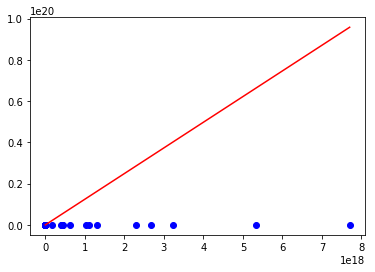

In [18]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')
plt.savefig("linear_reg_scatter_plot.png")